거래량 총량: 75859
      연도   거래량
0   2009  7208
1   2010  3846
2   2011  4084
3   2012  2601
4   2013  4752
5   2014  6025
6   2015  6862
7   2016  7548
8   2017  7782
9   2018  5130
10  2019  5168
11  2020  5907
12  2021  2259
13  2022   987
14  2023  2613
15  2024  3087


,시군구,계약년월,거래량,연도
29960,경기도 성남시 분당구 구미동,2009-01-01,98,2009
29961,경기도 성남시 분당구 구미동,2009-02-01,120,2009
29962,경기도 성남시 분당구 구미동,2009-03-01,104,2009
29963,경기도 성남시 분당구 구미동,2009-04-01,150,2009
29964,경기도 성남시 분당구 구미동,2009-05-01,72,2009


(1521, 4)


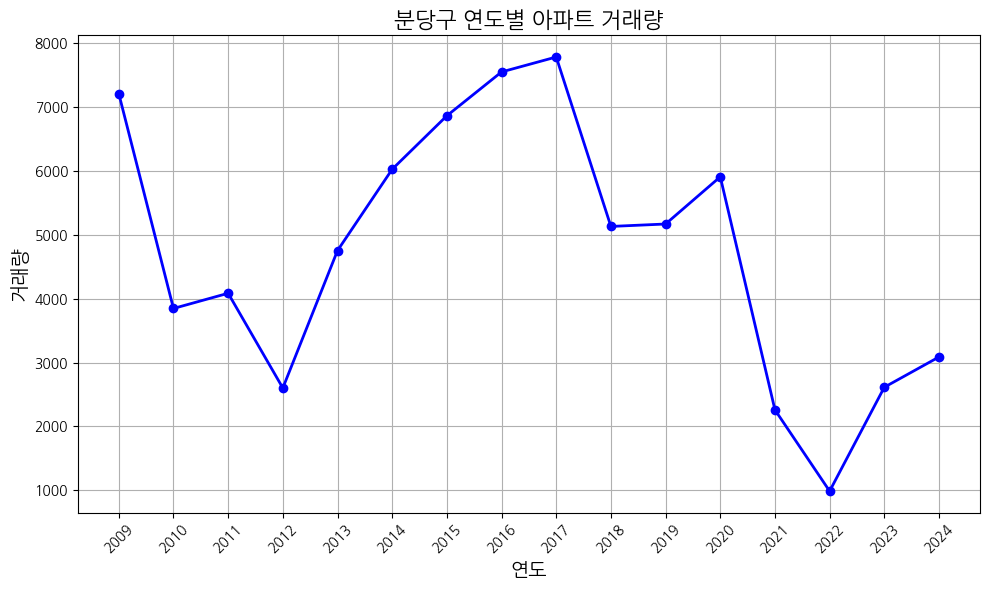

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 폰트 설정 (NanumGothic 사용)
font_path = '/Users/ihyeonglae/NewTownInsight/아파트 실거래가/NanumGothic.ttf'
fontprop = FontProperties(fname=font_path)


# CSV 파일 불러오기
df = pd.read_csv('/Users/ihyeonglae/NewTownInsight/아파트 실거래가/apt_price.csv',
                 encoding='UTF-8',
                 header=0)
df = df.drop(columns=['Unnamed: 0'])

# 필요한 컬럼만 선택
df = df[['시군구', '계약년월', '거래금액(만원)']]

# '계약년월'을 날짜 형식으로 변환
df['계약년월'] = pd.to_datetime(df['계약년월'], format='%Y%m')

# '시군구'와 '계약년월' 별로 그룹화하여 거래 건수 세기
count_by_bundang = df.groupby(['시군구', '계약년월']).size().reset_index(name='거래량')

# 필터링할 지역 리스트 설정
target_list = [
    '경기도 성남시 분당구 야탑동',
    '경기도 성남시 분당구 이매동',
    '경기도 성남시 분당구 서현동',
    '경기도 성남시 분당구 분당동',
    '경기도 성남시 분당구 수내동',
    '경기도 성남시 분당구 정자동',
    '경기도 성남시 분당구 금곡동',
    '경기도 성남시 분당구 구미동',
]


# target_list에 포함된 데이터만 필터링
count_by_bundang = count_by_bundang[count_by_bundang['시군구'].isin(target_list)]

# 2009년 이후 데이터만 필터링
count_by_bundang = count_by_bundang[count_by_bundang['계약년월'] >= '2009-01-01']

# **거래량 총량 계산**
total_transactions = count_by_bundang['거래량'].sum()
print("거래량 총량:", total_transactions)

# '계약년월'에서 연도 추출하여 '연도' 컬럼 생성
count_by_bundang['연도'] = count_by_bundang['계약년월'].dt.year

# 연도별 그룹화하여 거래량 합계 계산
annual_transactions = count_by_bundang.groupby('연도')['거래량'].sum().reset_index()

# 결과 출력
print(annual_transactions)


# 결과 확인
display(count_by_bundang.head())
print(count_by_bundang.shape)

# 그래프 크기 설정
plt.figure(figsize=(10, 6))


# 선 그래프 생성 (연도별 거래량)
plt.plot(annual_transactions['연도'], annual_transactions['거래량'], 
         color='blue', marker='o', linestyle='-', linewidth=2)

# 그래프 꾸미기
plt.xlabel('연도', fontproperties=fontprop, fontsize=14)
plt.ylabel('거래량', fontproperties=fontprop, fontsize=14)
plt.title('분당구 연도별 아파트 거래량', fontproperties=fontprop, fontsize=16)
plt.xticks(annual_transactions['연도'], fontproperties=fontprop, rotation=45)
plt.yticks(fontproperties=fontprop)
plt.grid(True)  # 격자 표시
plt.tight_layout()

# 그래프 출력
plt.show()




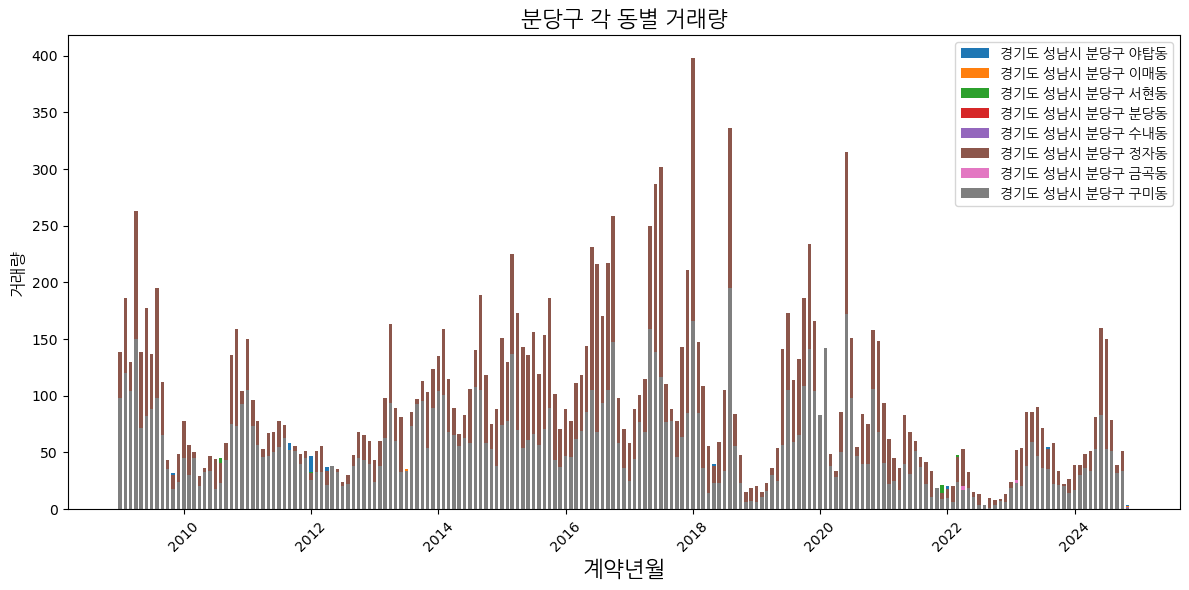

In [62]:
# 시각화
plt.figure(figsize=(12, 6))

# 각 '시군구'에 대해 막대 그래프 그리기
for 시군구 in target_bundang:
    data = count_by_sgg[count_by_sgg['시군구'] == 시군구]
    plt.bar(data['계약년월'], data['거래량'], label=시군구, width=20)

# 그래프 꾸미기
plt.xlabel('계약년월', fontproperties=fontprop, fontsize=16)
plt.ylabel('거래량', fontproperties=fontprop, fontsize=12)
plt.title('분당구 각 동별 거래량', fontproperties=fontprop, fontsize=16, loc='center')
plt.legend(prop=fontprop)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()